In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 2000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [34]:
df1 = pd.read_csv('Helpmefind_roses_merged_cleanned.csv')
df1.columns = ["Unnamed: 0","NAME","URL","SYNONYM","ARS","ORIG","CLASS","BLOOM","HABIT","GROWING","PARENTAGE","COMMENTS","BRED_BY","INTRODUCED_FULL", "INTRODUCED", "YEAR_CREATED", "BRED_BY_DOB", "ALL_YEARS", "COUNTRY", "EXH_NAME","REGISTR_NAME", "PETALS", "COLOR", "PETALS2", "PETALS3", "ALL_PETALS_BRACKETS", "MAIN_COLOR" ]

In [35]:
del df1['Unnamed: 0']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54162 entries, 0 to 54161
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME                 51422 non-null  object 
 1   URL                  54124 non-null  object 
 2   SYNONYM              33624 non-null  object 
 3   ARS                  35714 non-null  object 
 4   ORIG                 50961 non-null  object 
 5   CLASS                54122 non-null  object 
 6   BLOOM                50672 non-null  object 
 7   HABIT                33204 non-null  object 
 8   GROWING              40187 non-null  object 
 9   PARENTAGE            53422 non-null  object 
 10  COMMENTS             54118 non-null  object 
 11  BRED_BY              50960 non-null  object 
 12  INTRODUCED_FULL      49878 non-null  object 
 13  INTRODUCED           20464 non-null  object 
 14  YEAR_CREATED         49737 non-null  float64
 15  BRED_BY_DOB          5326 non-null  

## Wordcloud visualizations

##### Lets create a wordcloud vis for column BLOOM. 

There are 6564459 words in the combination of all cells in column BLOOM.


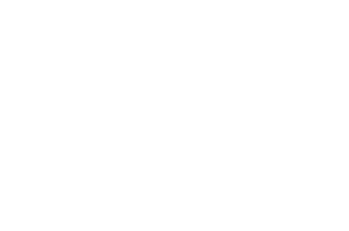

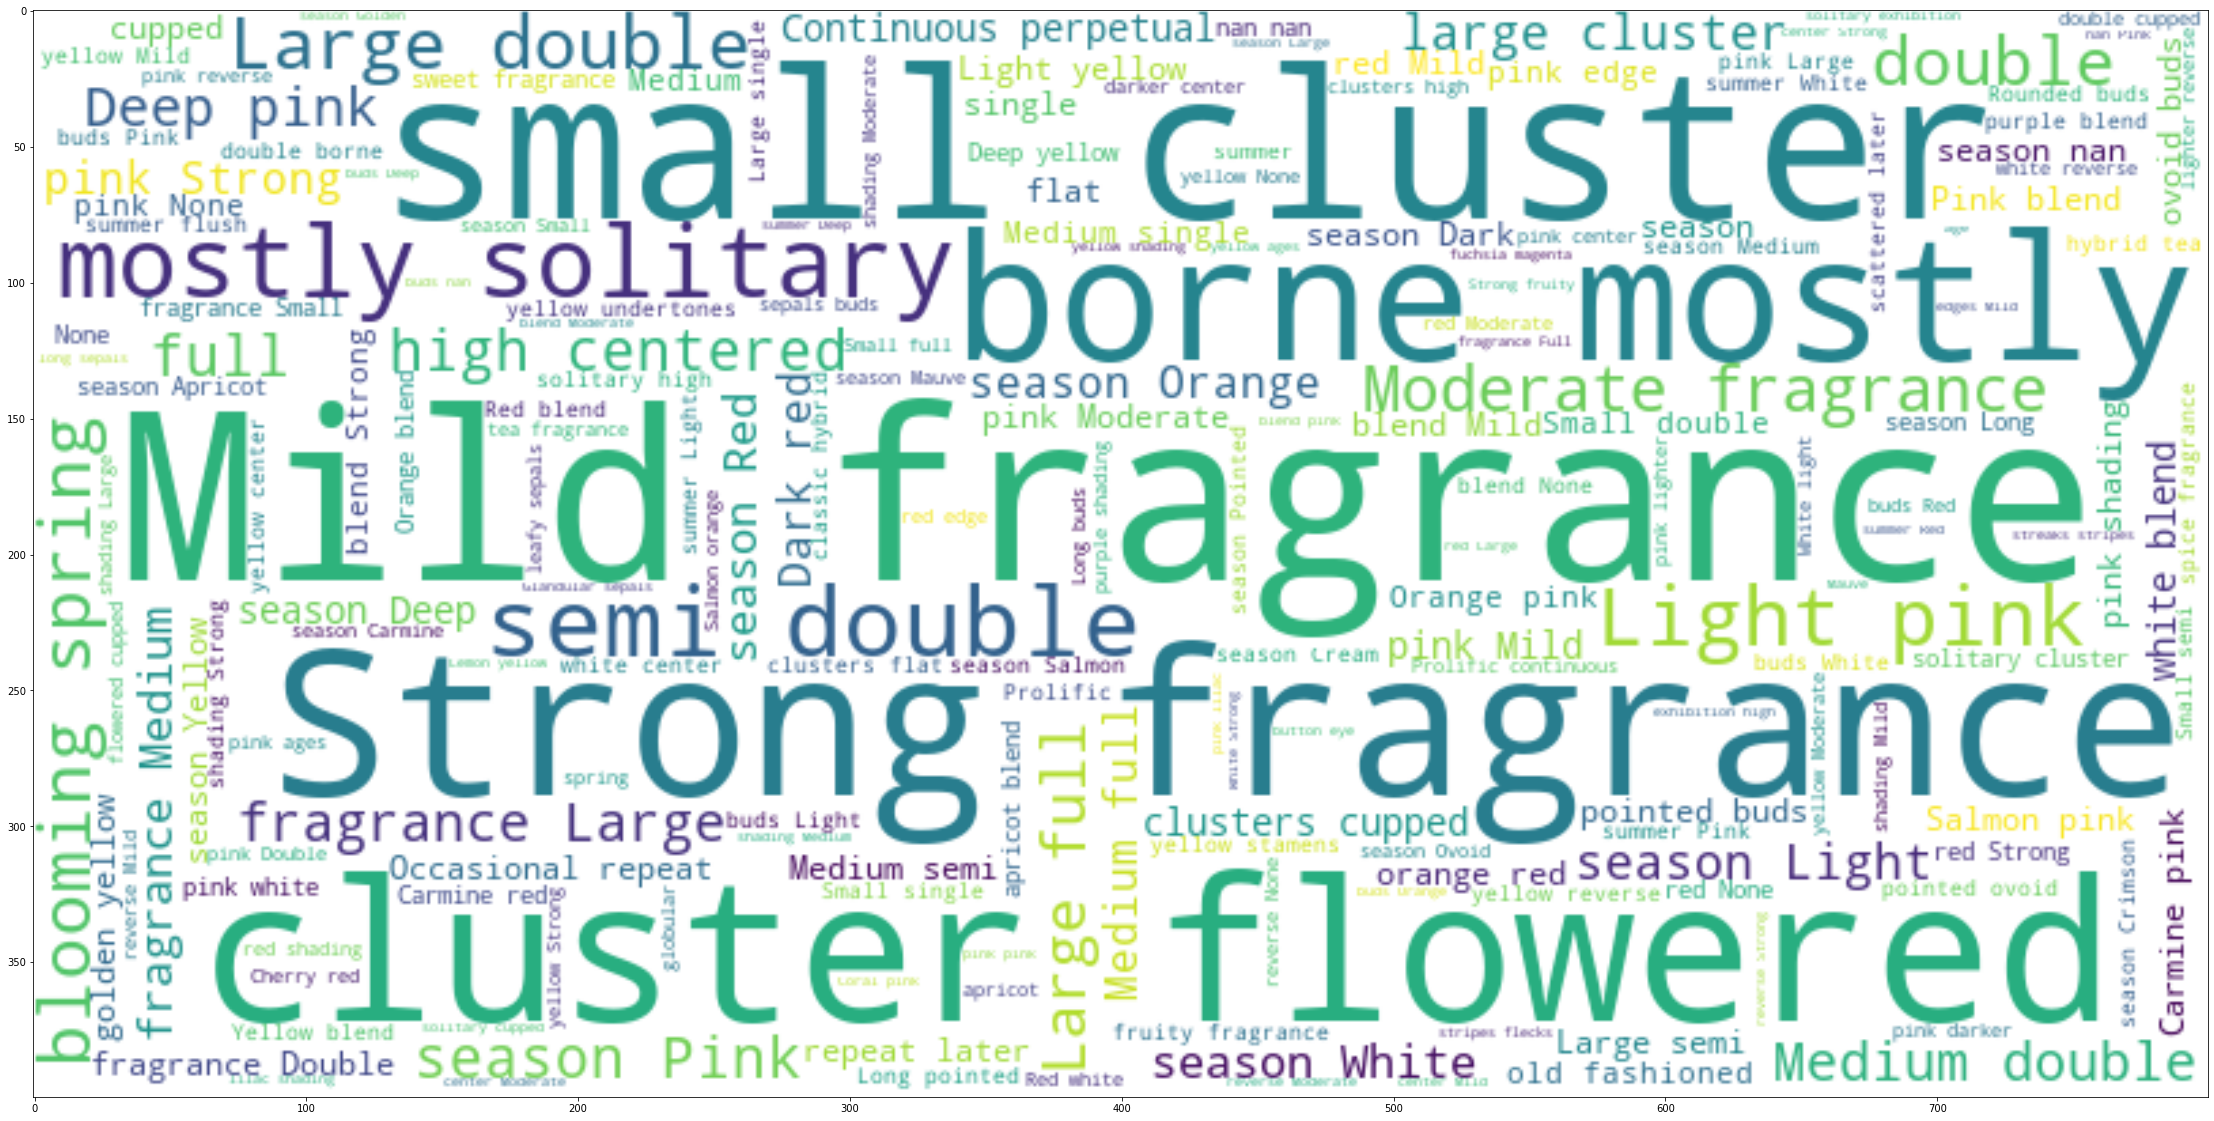

In [36]:
# Python program to generate WordCloud for column BLOOM

# all words in column bloom
text = " ".join(review for review in df1.BLOOM.astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["bloom", "rose", "petals", "Average", "diameter","flushes", 'throughout', "Blooms", "form"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 2333787 words in the combination of all cells in column HABIT.


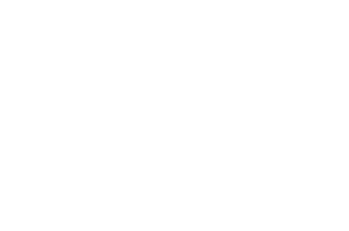

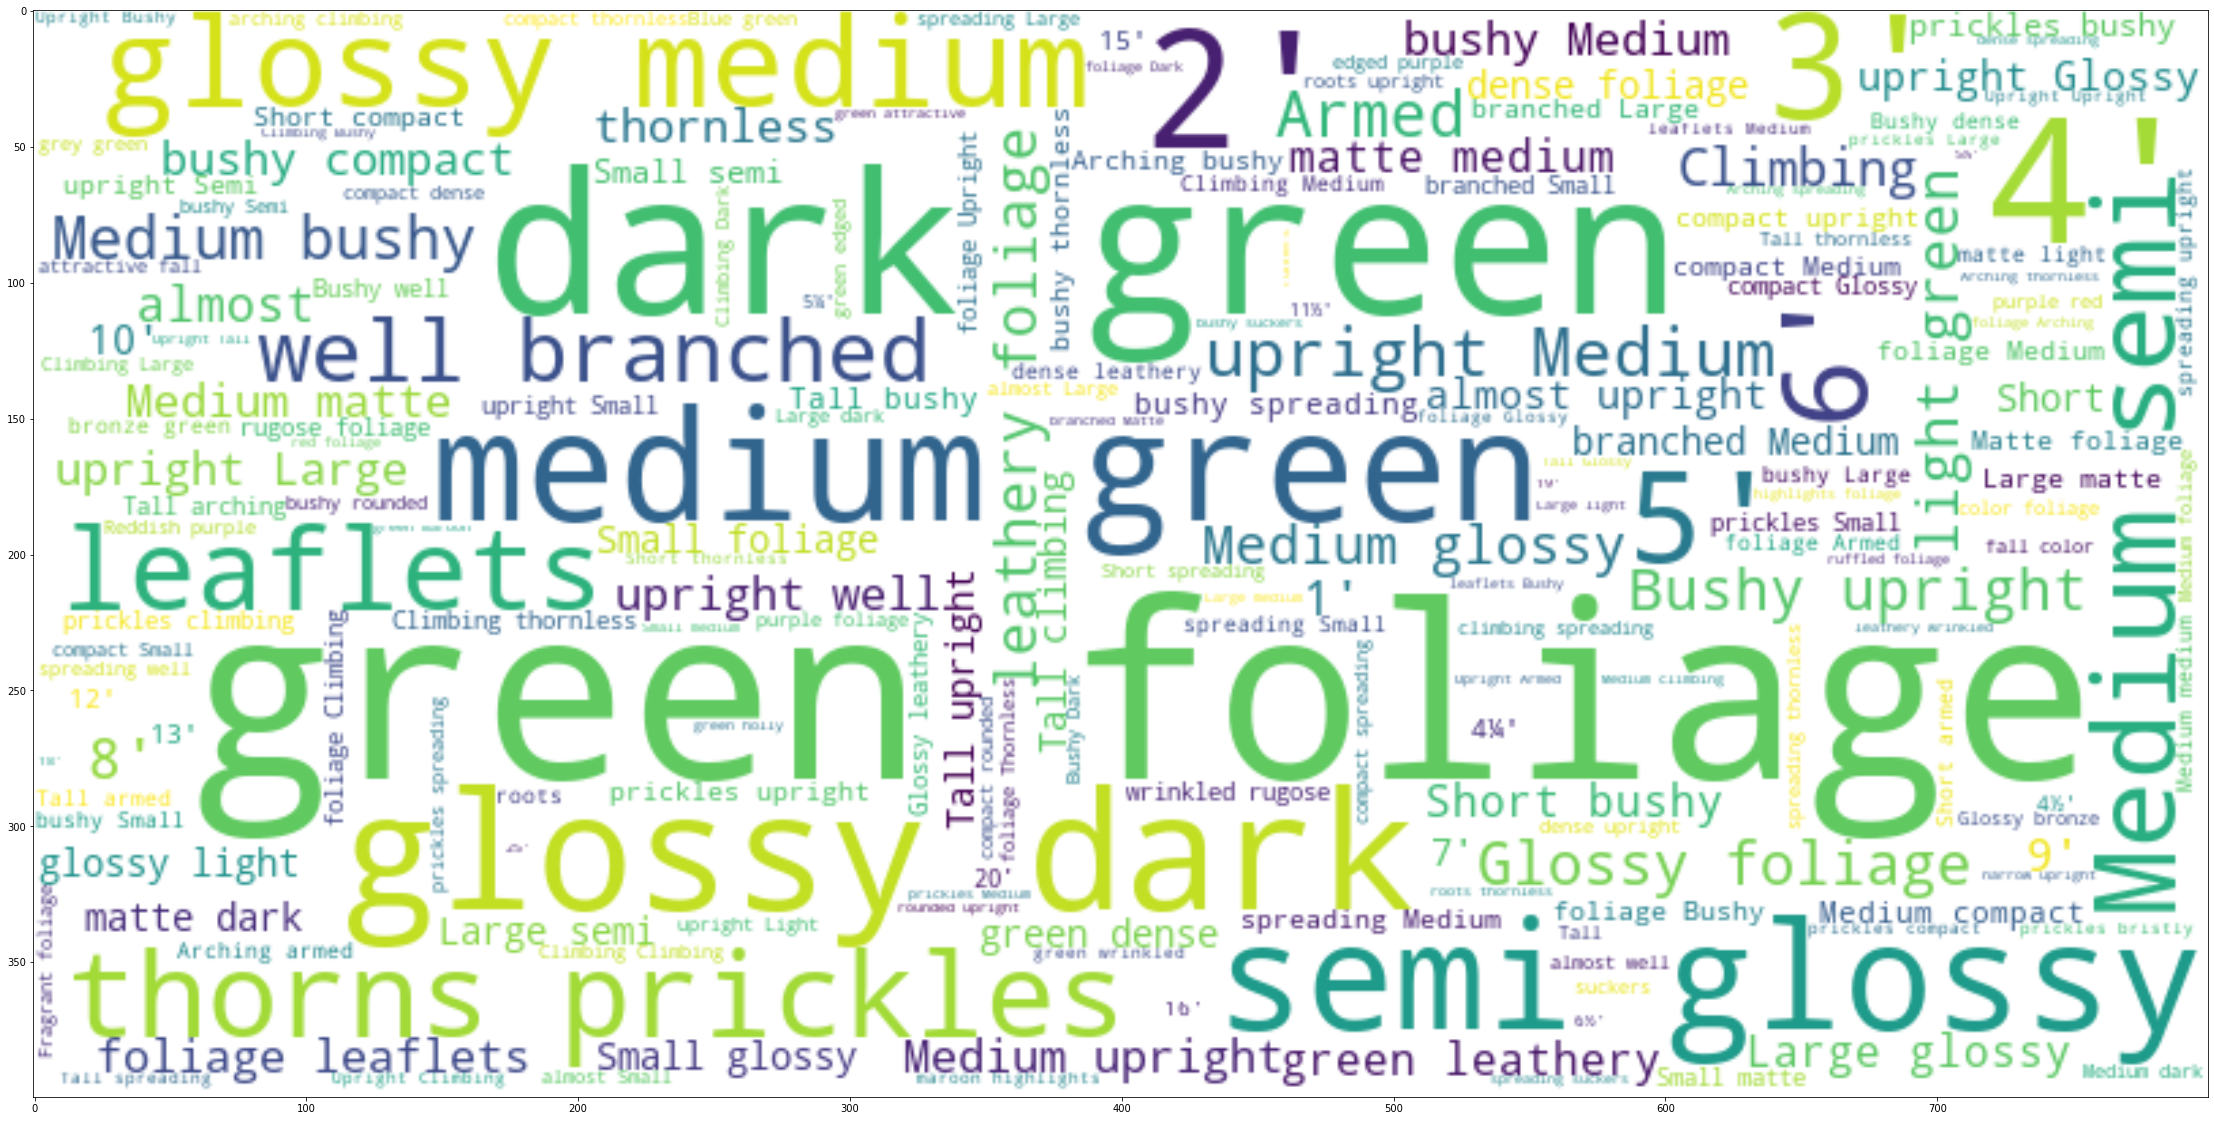

In [37]:
# Python program to generate WordCloud for column HABIT

# all words in column bloom
text = " ".join(review for review in df1.HABIT.astype(str))
print ("There are {} words in the combination of all cells in column HABIT.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["bloom", "rose", "petals","Width", "Height", "cm", "nan"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 4557934 words in the combination of all cells in column GROWING.


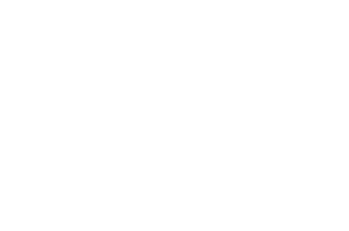

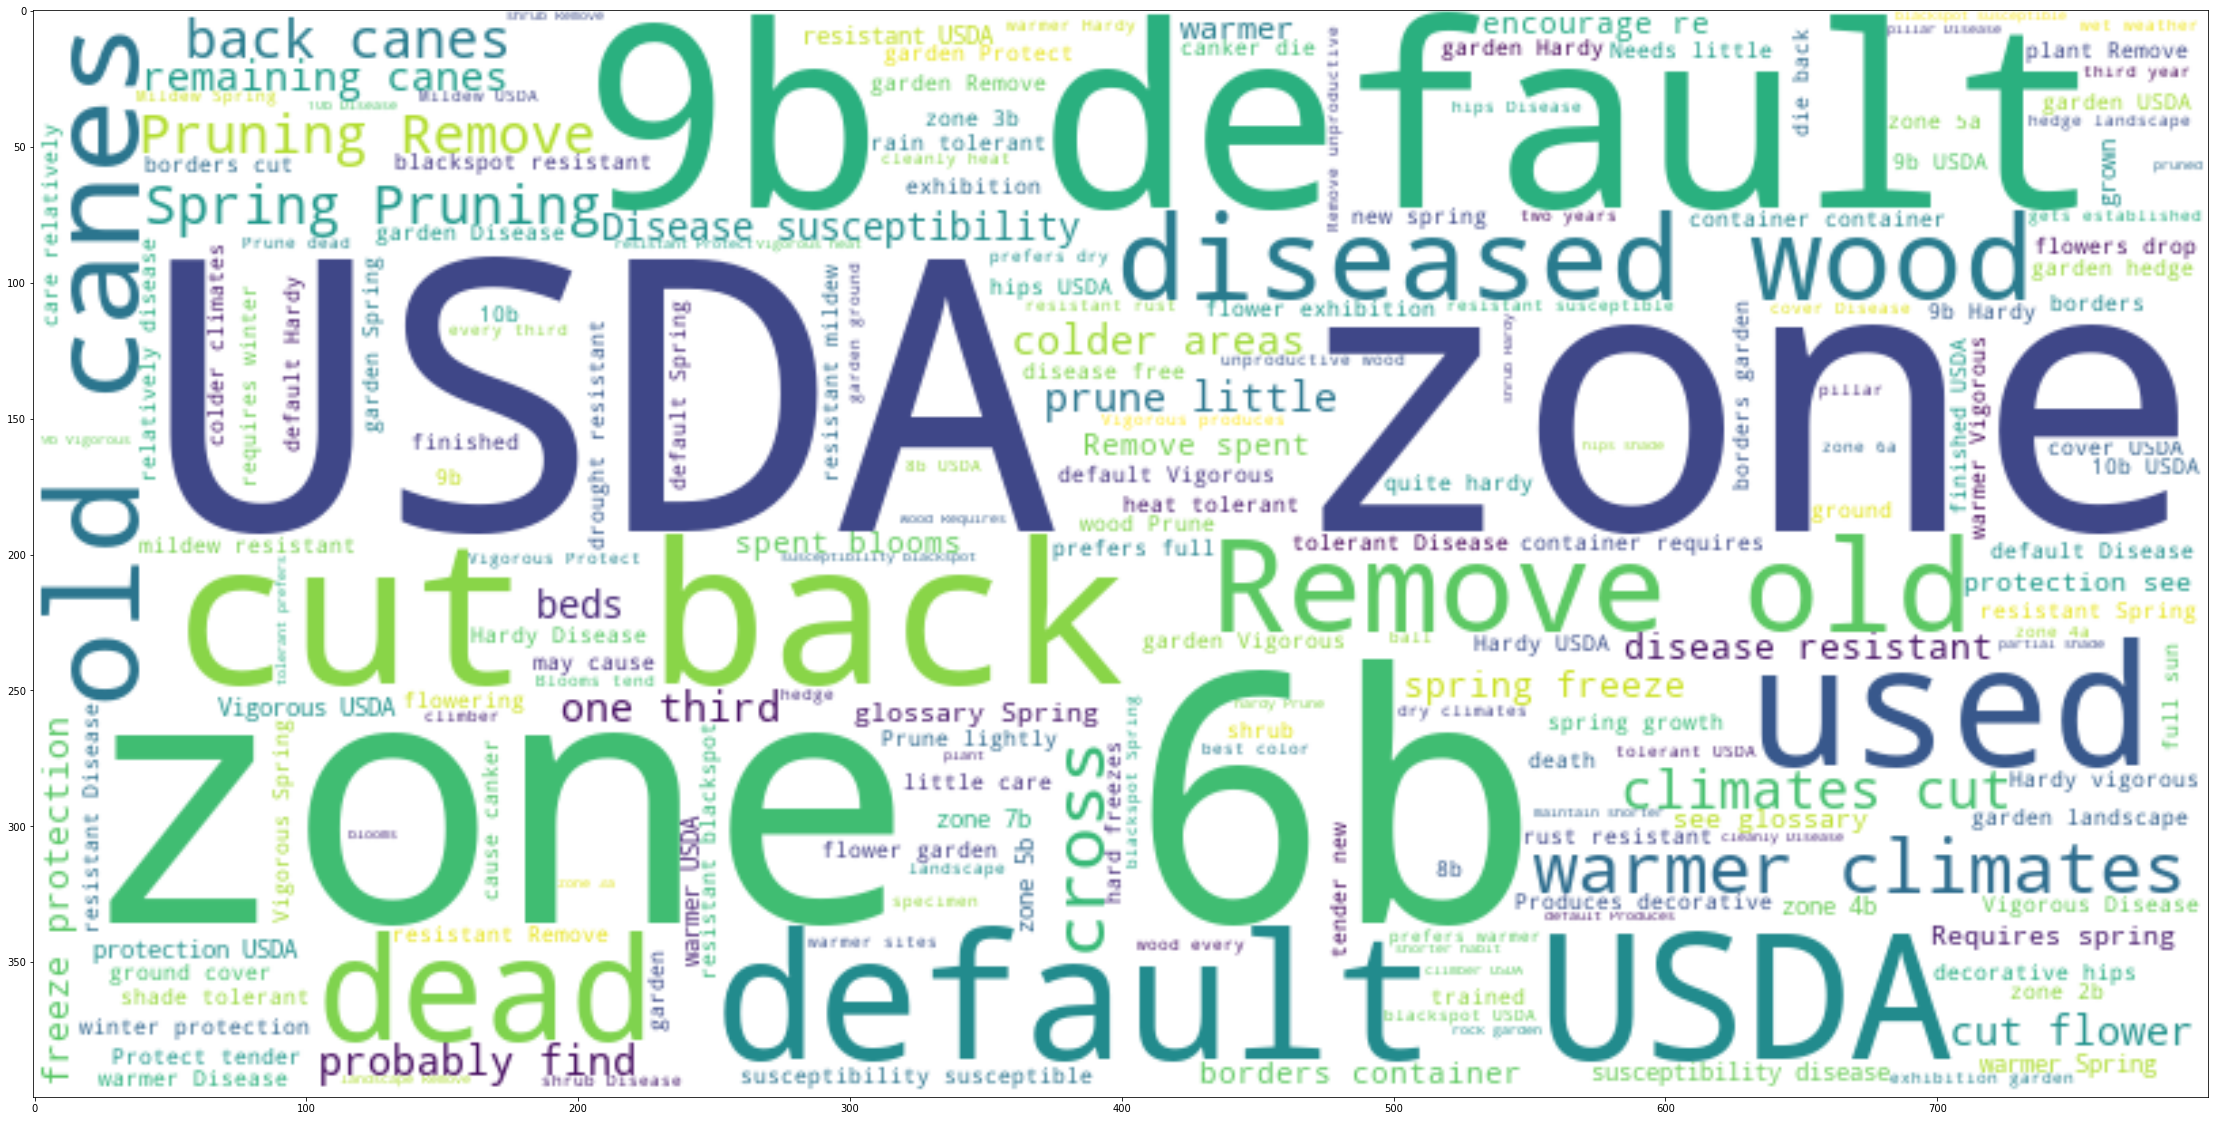

In [38]:
# Python program to generate WordCloud for column GROWING

# all words in column bloom
text = " ".join(review for review in df1.GROWING.astype(str))
print ("There are {} words in the combination of all cells in column GROWING.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["bloom", "rose", "petals", "nan"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Map with Folium - Viz Country counts

In [39]:
import folium
country_geo = 'world-countries.json'

In [40]:
df1.COUNTRY.value_counts()

United States          8512
France                 8454
Germany                4038
United Kingdom         3679
Netherlands            1660
Denmark                1449
Australia              1233
Canada                 962 
Japan                  941 
New Zealand            765 
India                  628 
Italy                  557 
Belgium                555 
s                      544 
Unknown                395 
Ireland                298 
Luxembourg             277 
South Africa           208 
....-                  204 
Hungary                182 
Switzerland            179 
Czechoslovakia         172 
Finland                151 
Spain                  140 
USSR                   119 
Portugal               112 
Slovakia               81  
Poland                 80  
.... -                 79  
China                  61  
c                      59  
Czech Republic         56  
Romania                48  
Ukraine                47  
Slovenia               43  
S                   

In [41]:
# creating a dataframe with counts for column country
ctn = df1['COUNTRY'].value_counts()\
                 .to_frame('COUNT').rename_axis('COUNTRY')\
                 .reset_index()
ctn

COUNTRY  COUNT
0   United States        8512 
1   France               8454 
2   Germany              4038 
3   United Kingdom       3679 
4   Netherlands          1660 
5   Denmark              1449 
6   Australia            1233 
7   Canada               962  
8   Japan                941  
9   New Zealand          765  
10  India                628  
11  Italy                557  
12  Belgium              555  
13  s                    544  
14  Unknown              395  
15  Ireland              298  
16  Luxembourg           277  
17  South Africa         208  
18  ....-                204  
19  Hungary              182  
20  Switzerland          179  
21  Czechoslovakia       172  
22  Finland              151  
23  Spain                140  
24  USSR                 119  
25  Portugal             112  
26  Slovakia             81   
27  Poland               80   
28  .... -               79   
29  China                61   
30  c                    59   
31  Czech Republic       56   
32  Romania              48   
33  Ukraine              47   
34  Slovenia             43   
35  S                    37   
36  Russia               36   
37  Serbia               29   
38  Austria              29   
39  ""                   27   
40  Latvia               25   
41  Bulgaria             25   
42  Brazil               22   
43  Thailand             21   
44  Norway               16   
45  Bermuda              12   
46  ?                    12   
47  Sweden               11   
48  Iceland              10   
49  Israel               9    
50  Argentina            6    
51  Croatia              4    
52  Bangladesh           3    
53  South Korea          2    
54  Austria-Hungary      2    
55  Estonia              2    
56  Taiwan               2    
57  Zimbabwe             2    
58  Turkey               2    
59  Canada US            1    
60  Uruguay              1    
61  Saudi Arabia         1    
62  not P. ?             1    
63  Georgia              1    
64  Colombia             1    
65  Antigua and Barbuda  1

In [42]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[0, 0], zoom_start=1.5)
json_url = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"


# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data=json_url, data=ctn,
             columns=['COUNTRY', 'COUNT'],
             key_on='feature.properties.name', 
             nan_fill_color='white',
             legend_name='Number of roses invented per country',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2)
map

/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


##### Which countries invented more rose varieties - Map view.


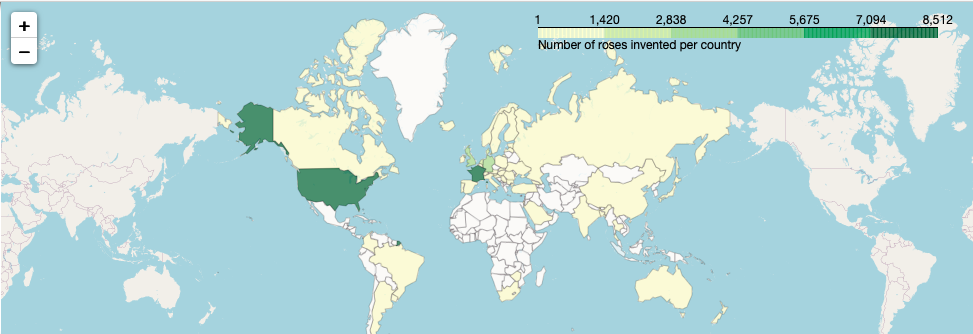

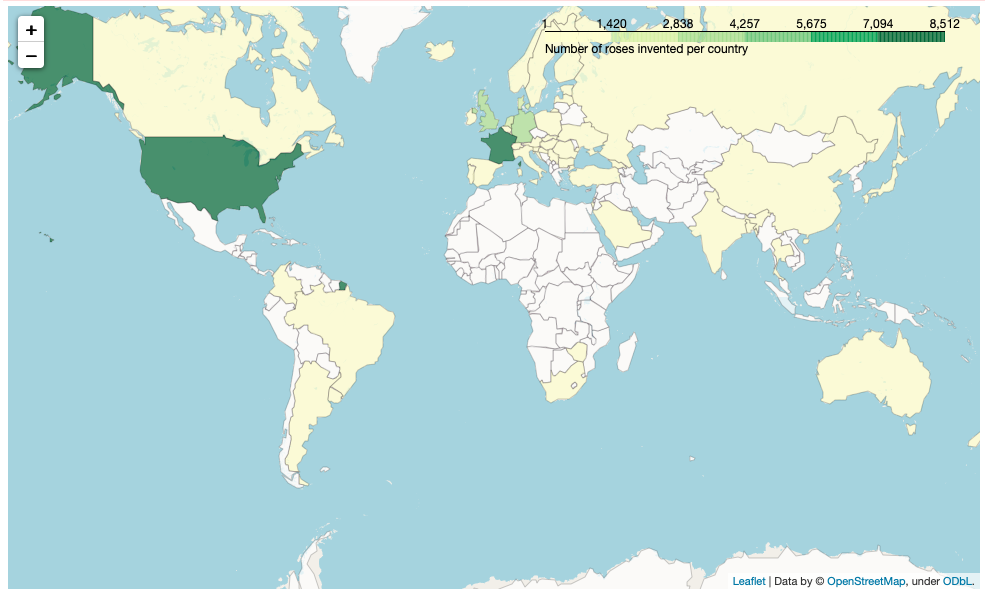


In [43]:
import seaborn as sns

Text(0.5, 0.98, 'Top 10 countries that created more roses')

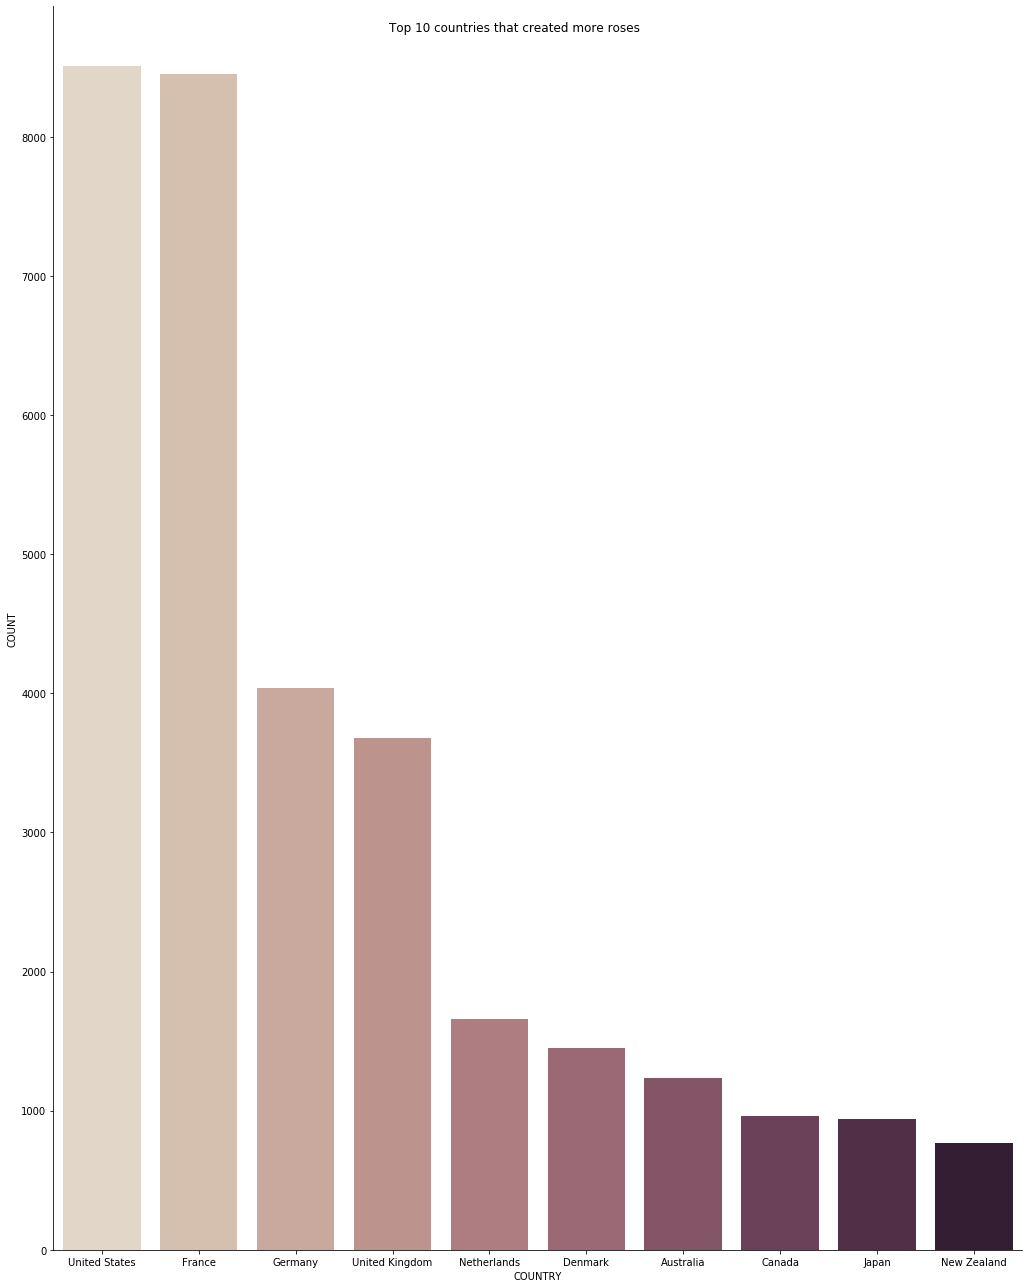

In [69]:
# bar for top 10 countries
# which countries invented more rose varieties - bar chart
ctn10 = ctn.head(10)
ax = sns.catplot(y="COUNT", x="COUNTRY", kind="bar", palette="ch:.25",  data=ctn10, height=18, aspect=.8);
ax.fig.suptitle("Top 10 countries that created more roses")

## What are the most common rose colors?

In [45]:
df1.MAIN_COLOR.value_counts().head(20)

Pink                        5440
Light pink                  4231
Red                         3523
White                       3065
Deep pink                   2514
Dark red                    1928
Yellow                      1905
White or white blend        1717
Pink blend                  1450
Cream                       1055
Crimson                     929 
LightYellow                 924 
Orange blend                894 
Orange-pink                 844 
Salmon-pink                 798 
Deep Yellow                 753 
Apricot or apricot blend    713 
Red blend                   710 
Orange or orange-red        668 
Rose-pink                   657 
Name: MAIN_COLOR, dtype: int64

In [46]:
# creating a dataframe with counts for column main_color
ctn_color = df1['MAIN_COLOR'].value_counts()\
                 .to_frame('COUNT').rename_axis('MAIN_COLOR')\
                 .reset_index()

ctn_color_15 = ctn_color.head(15)

Text(0.5, 0.98, 'What are most common 15 colors seein in roses?')

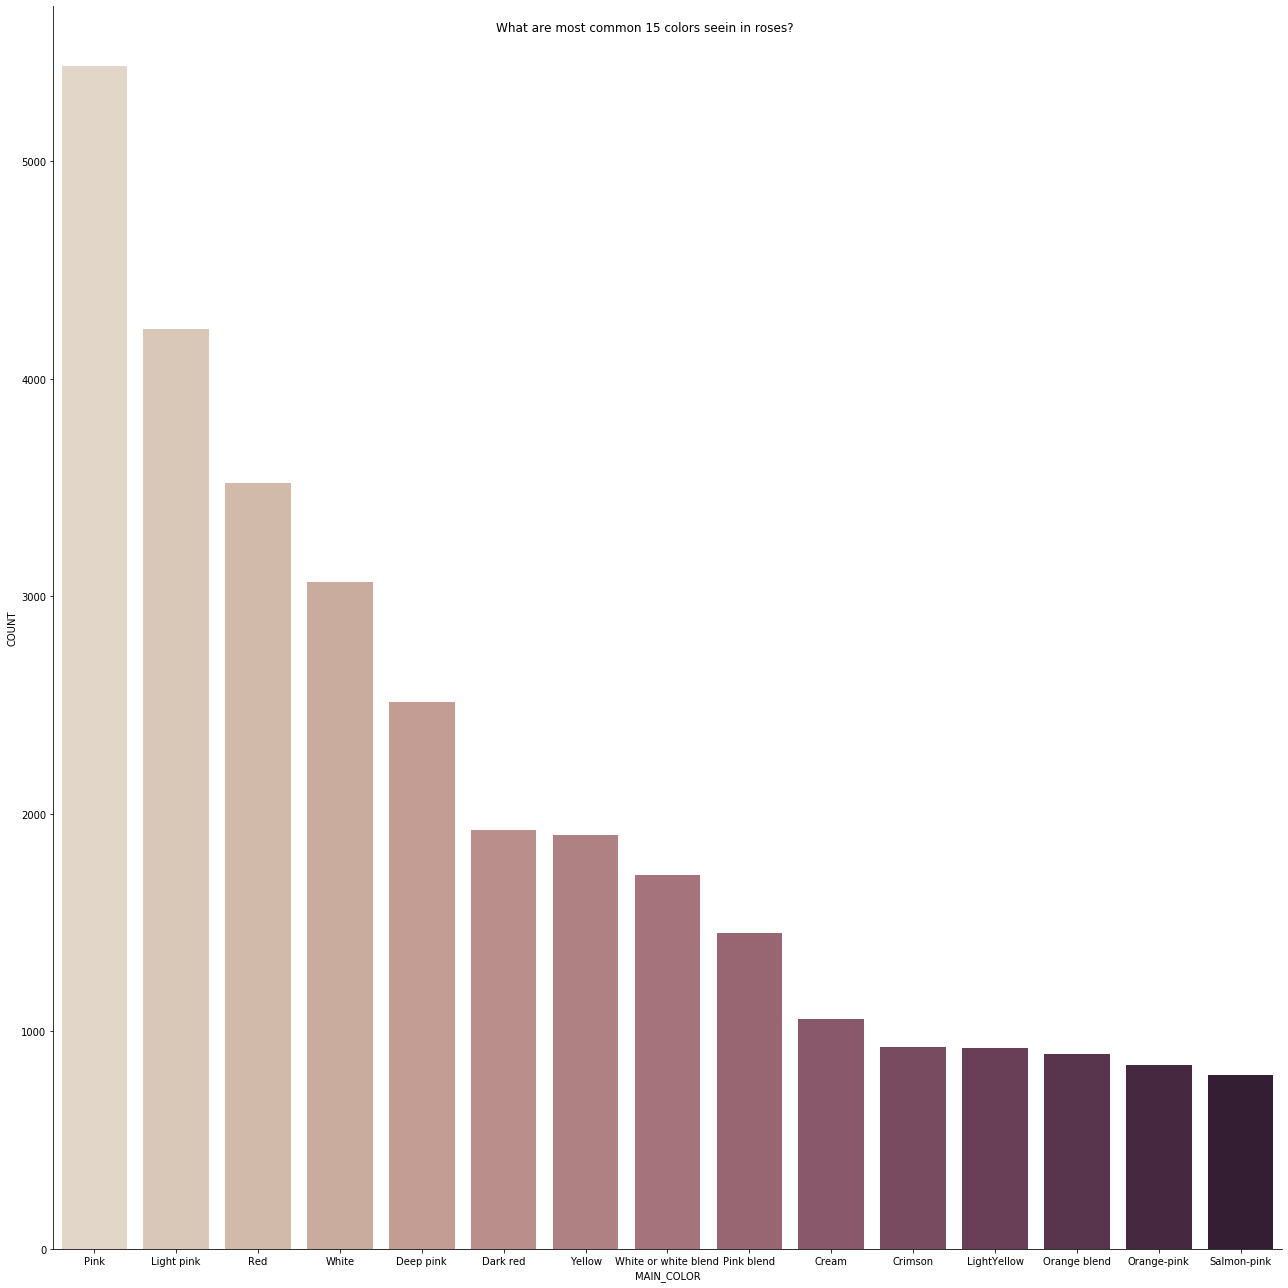

In [70]:
ax = sns.catplot(y="COUNT", x="MAIN_COLOR", kind="bar", palette="ch:.25",  data=ctn_color_15, height=18, aspect=1);

ax.fig.suptitle("What are most common 15 colors seein in roses?")

## Who created/bread more rose varieties?

In [48]:
df1.BRED_BY.value_counts().head(20)

 Unknown                       2879
 W. Kordes & Sons              1181
 Samuel Darragh McGredy IV     1069
 L. Pernille Olesen            730 
 André Carl                    719 
 Jean-Pierre Vibert            568 
 Reimer Kordes                 513 
 Mogens Nyegaard Olesen        498 
 Harkness                      485 
 Hans Jürgen Evers             475 
 Meilland International        405 
 Ralph S. Moore                395 
 Alain Meilland                389 
 Jean Laffay                   372 
 Tim Hermann Kordes            370 
 Dr. Keith W. Zary             337 
 Louis Lens                    330 
 David C. H. Austin            327 
 Gareth Fryer                  322 
 Robert Neil Rippetoe          319 
Name: BRED_BY, dtype: int64

In [49]:
# creating a dataframe with counts for column main_color
ctn_bred_by = df1['BRED_BY'].value_counts()\
                 .to_frame('COUNT').rename_axis('BRED_BY')\
                 .reset_index()

ctn_bred_by_20 = ctn_bred_by.head(20)
ctn_bred_by_10 = ctn_bred_by.head(10)

Text(0.5, 0.98, 'Who created more roses? - Top 20 results')

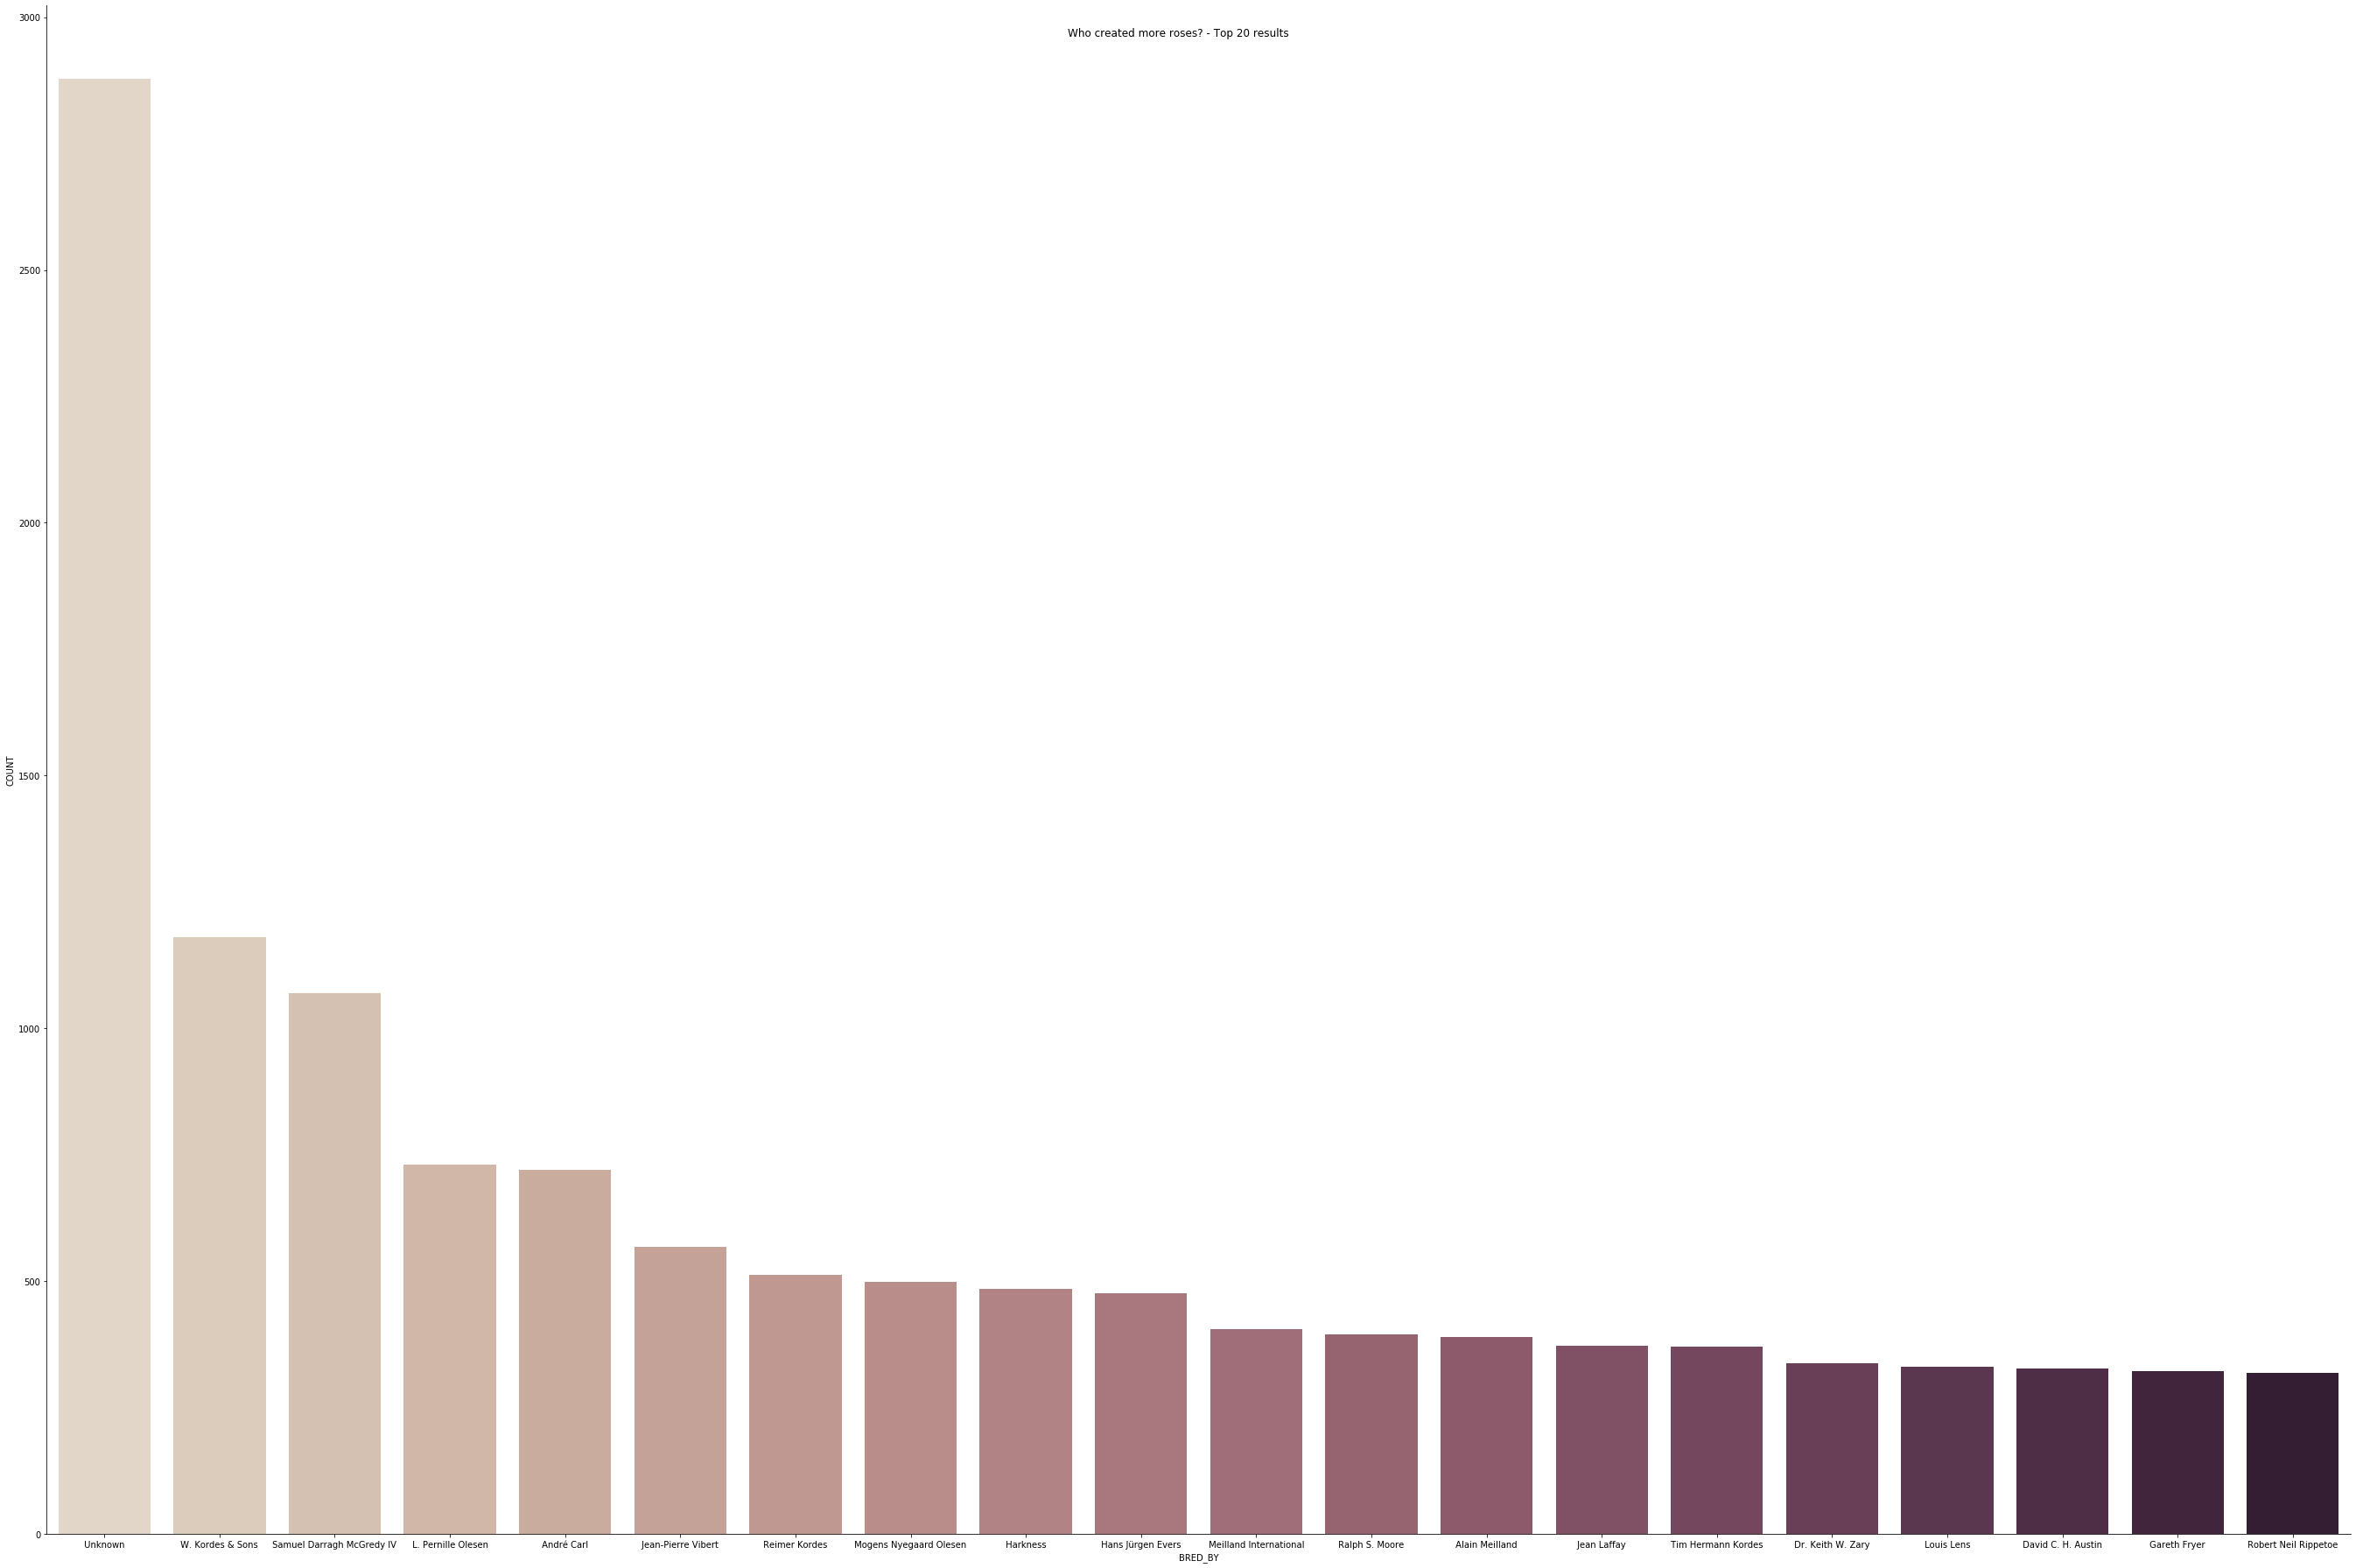

In [72]:
ax = sns.catplot(y="COUNT", x="BRED_BY", kind="bar", palette="ch:.25",  data=ctn_bred_by_20, height=25, aspect=1.5);

ax.fig.suptitle("Who created more roses? - Top 20 results")

Text(0.5, 0.98, 'What are most common 10 colors seein in roses?')

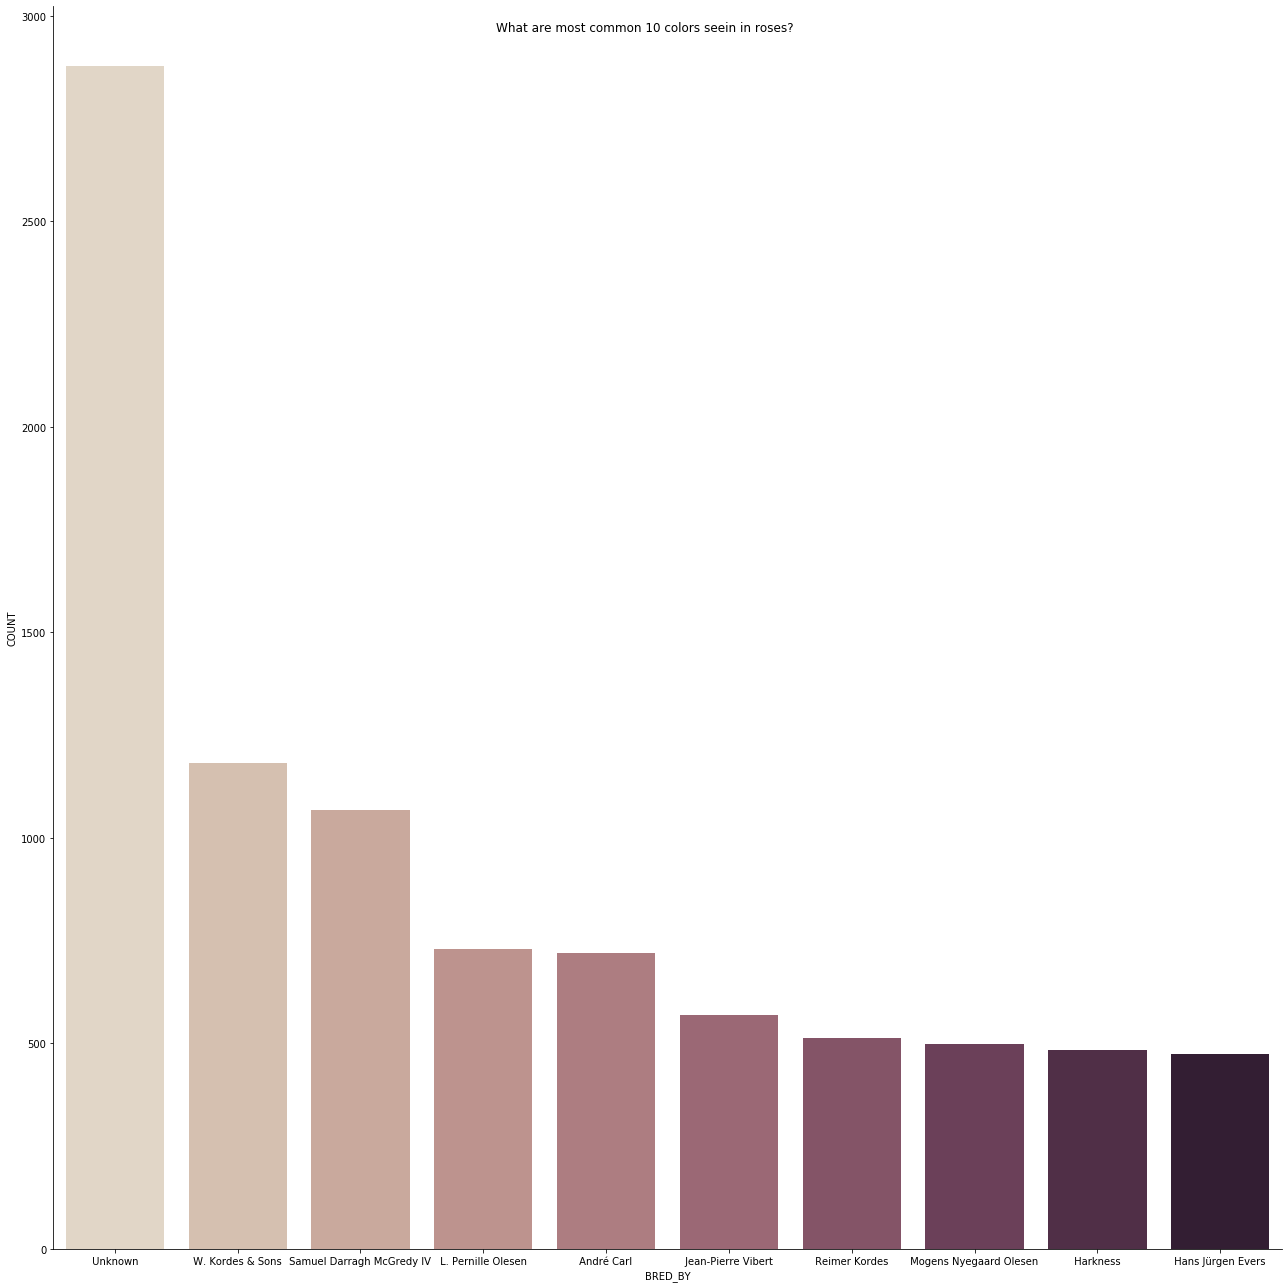

In [73]:
ax = sns.catplot(y="COUNT", x="BRED_BY", kind="bar", palette="ch:.25",  data=ctn_bred_by_10, height=18, aspect=1);

ax.fig.suptitle("What are most common 10 colors seein in roses?")

## In which year more roses were created? What's the trend?

In [52]:
df1.YEAR_CREATED.value_counts()

2006.0    1027
2007.0    1010
2005.0    925 
2001.0    893 
2013.0    856 
2008.0    832 
2000.0    821 
2009.0    774 
1998.0    761 
2018.0    730 
2011.0    714 
2004.0    708 
1997.0    707 
1991.0    703 
1999.0    695 
2012.0    673 
2015.0    665 
2002.0    650 
1996.0    635 
1995.0    626 
2003.0    620 
2010.0    616 
2014.0    590 
1988.0    590 
2016.0    585 
1940.0    558 
1992.0    533 
1993.0    519 
1994.0    513 
1986.0    512 
1990.0    506 
1989.0    497 
1987.0    493 
1985.0    483 
1956.0    477 
1984.0    430 
1948.0    424 
1982.0    412 
1983.0    375 
2017.0    372 
1828.0    327 
2019.0    319 
1817.0    314 
1836.0    313 
1980.0    311 
1976.0    307 
1981.0    303 
1979.0    294 
1973.0    279 
1978.0    271 
1977.0    268 
1826.0    264 
1820.0    257 
1975.0    243 
1969.0    241 
1970.0    240 
1960.0    237 
1825.0    234 
1824.0    234 
1829.0    232 
1958.0    224 
1972.0    223 
1965.0    222 
1837.0    221 
1966.0    217 
1955.0    217 
1974.0    

In [63]:
›
df1['Century'] = df1['YEAR_CREATED_STR'][2:] + "00"
#century = stringyear[:2] + "00"
#century = int(century)
df1.head()

NAME                                                URL                         SYNONYM                                                                                       ARS                                                                                                                                      ORIG          CLASS                                                                                                                                                                                                                                        BLOOM                                                          HABIT                                  GROWING                                                                             PARENTAGE                                                                                                                      COMMENTS                      BRED_BY                                          INTRODUCED_FULL                                                               INTRODUCED  YEAR_CREATED BRED_BY_DOB         ALL_YEARS      COUNTRY                EXH_NAME     REGISTR_NAME        PETALS                                               COLOR PETALS2 PETALS3 ALL_PETALS_BRACKETS     MAIN_COLOR   Century YEAR_CREATED_STR
0  Evert van Dijk   https://www.helpmefind.com/rose/l.php?l=2.62713.1  • Evert van Dyk                 Registration name: Evert van Dyk                                                          Bred by Gerald Adriaan Van Rossem (Netherlands, 1931). Introduced in Australia by Hazlewood Bros. Pty. Ltd. in 1934 as 'Evert van Dyk'.   Hybrid Tea.    Carmine-pink, salmon-pink streaks, stripes, flecks.  Warm pink, clear carmine pink, rose pink shaded salmon.  Mild fragrance.  Large, very double, in small clusters, high-centered bloom form.  Blooms in flushes throughout the season.    Bushy, upright, well-branched.  Glossy, dark green foliage.    Hardy.                                   \nOphelia (hybrid tea, Paul, 1912) × \nAmerica (hybrid tea, Hill, 1921)               See references for more.   The bloom was said to be "compact" and the foliage "reddy green', with the wood and spines "red".   Gerald Adriaan Van Rossem   Bred by Gerald Adriaan Van Rossem (Netherlands, 1931).    in Australia by Hazlewood Bros. Pty. Ltd. in 1934 as 'Evert van Dyk'.   1931.0        NaN         ['1931', '1934']  Netherlands  NaN                     Evert van Dyk    NaN           Carmine-pink, salmon-pink streaks, stripes, flecks  NaN     NaN     []                  Carmine-pink   2010.000  1931.0         
1  Evert van Dyk    https://www.helpmefind.com/rose/l.php?l=2.62713    • Evert van Dijk                Registration name: Evert van Dyk                                                          Bred by Gerald Adriaan Van Rossem (Netherlands, 1931). Introduced in Australia by Hazlewood Bros. Pty. Ltd. in 1934 as 'Evert van Dyk'.   Hybrid Tea.    Carmine-pink, salmon-pink streaks, stripes, flecks.  Warm pink, clear carmine pink, rose pink shaded salmon.  Mild fragrance.  Large, very double, in small clusters, high-centered bloom form.  Blooms in flushes throughout the season.    Bushy, upright, well-branched.  Glossy, dark green foliage.    Hardy.                                   \nOphelia (hybrid tea, Paul, 1912) × \nAmerica (hybrid tea, Hill, 1921)               See references for more.   The bloom was said to be "compact" and the foliage "reddy green', with the wood and spines "red".   Gerald Adriaan Van Rossem   Bred by Gerald Adriaan Van Rossem (Netherlands, 1931).    in Australia by Hazlewood Bros. Pty. Ltd. in 1934 as 'Evert van Dyk'.   1931.0        NaN         ['1931', '1934']  Netherlands  NaN                     Evert van Dyk    NaN           Carmine-pink, salmon-pink streaks, stripes, flecks  NaN     NaN     []                  Carmine-pink   2010.000  1931.0         
2  Every Good Gift  https://www.helpmefind.com/rose/l.php?l=2.63618    NaN                             Medium red Hyb

In [53]:
# creating a dataframe with counts for column main_color
ctn_year = df1['YEAR_CREATED'].value_counts()\
                 .to_frame('COUNT').rename_axis('YEAR_CREATED')\
                 .reset_index()

ctn_year_20 = ctn_year.head(20)
ctn_year_10 = ctn_year.head(10)

In [9]:
ctn_year_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR_CREATED  10 non-null     float64
 1   COUNT         10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [13]:
# we dont want to have .0 after a year on the viz 
# changing colum type to int from float
ctn_year_10['YEAR_CREATED'] = ctn_year_10['YEAR_CREATED'].astype(np.int64)
ctn_year['YEAR_CREATED'] = ctn_year['YEAR_CREATED'].astype(np.int64)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0.98, 'Top 10 years when most roses were invented')

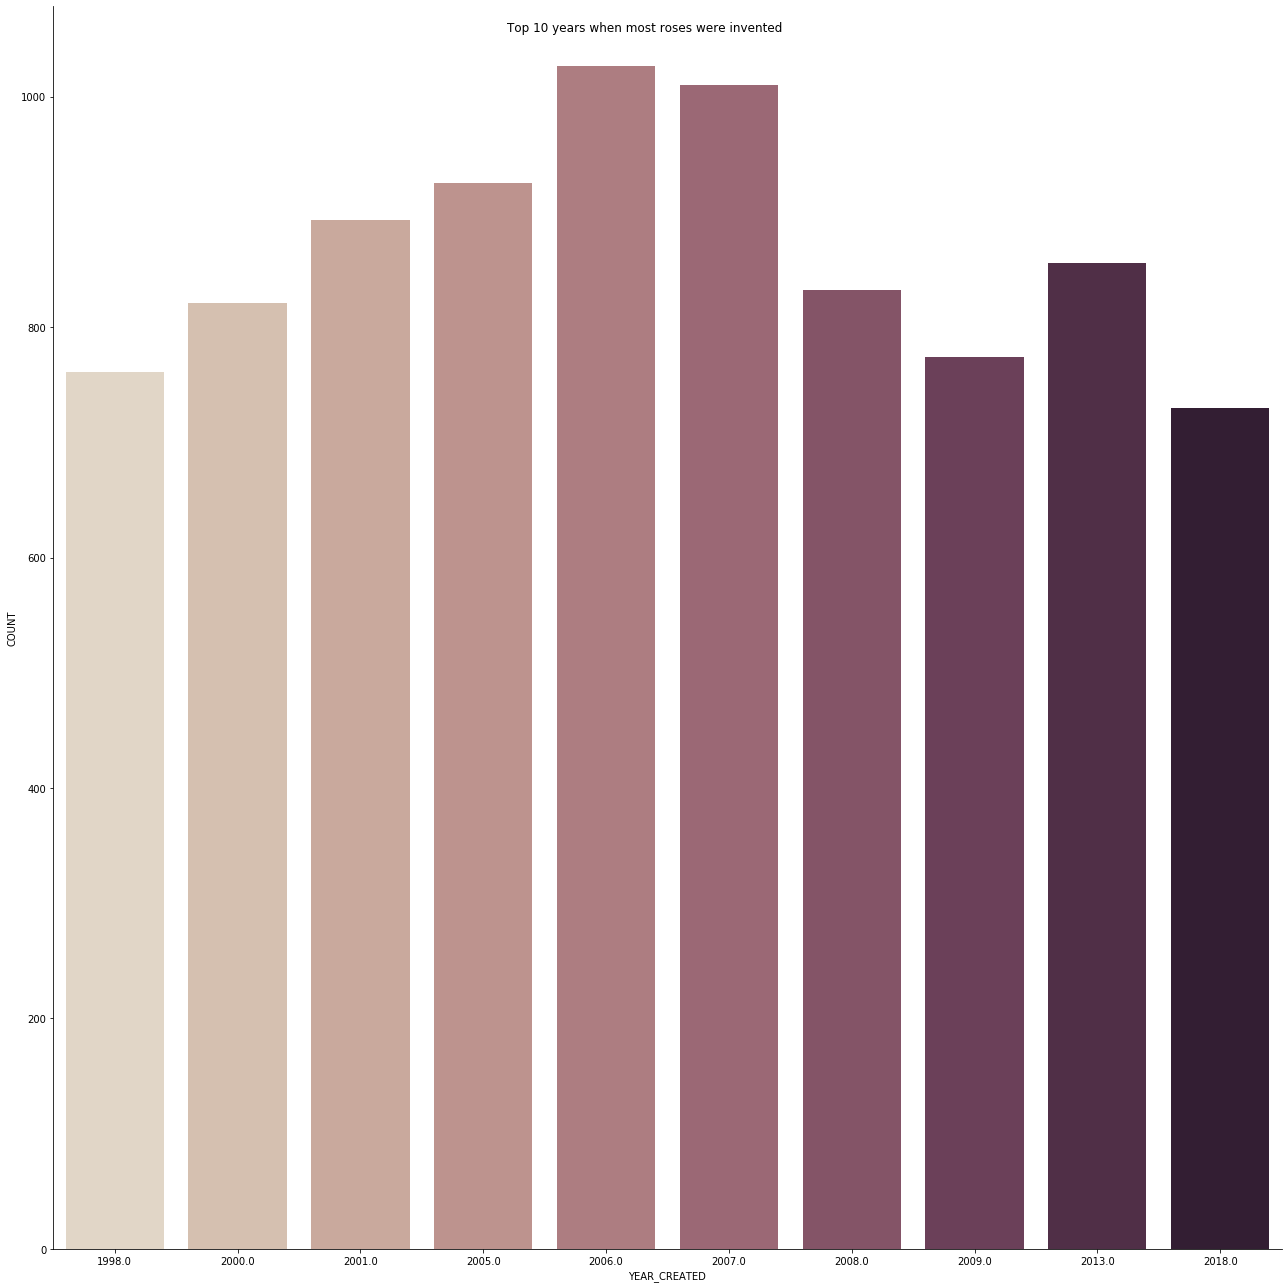

In [74]:
ax = sns.catplot(y="COUNT", x="YEAR_CREATED", kind="bar", palette="ch:.25",  data=ctn_year_10, height=18, aspect=1);

ax.fig.suptitle("Top 10 years when most roses were invented")

Text(0.5, 0.98, 'Count of roses created in each year')

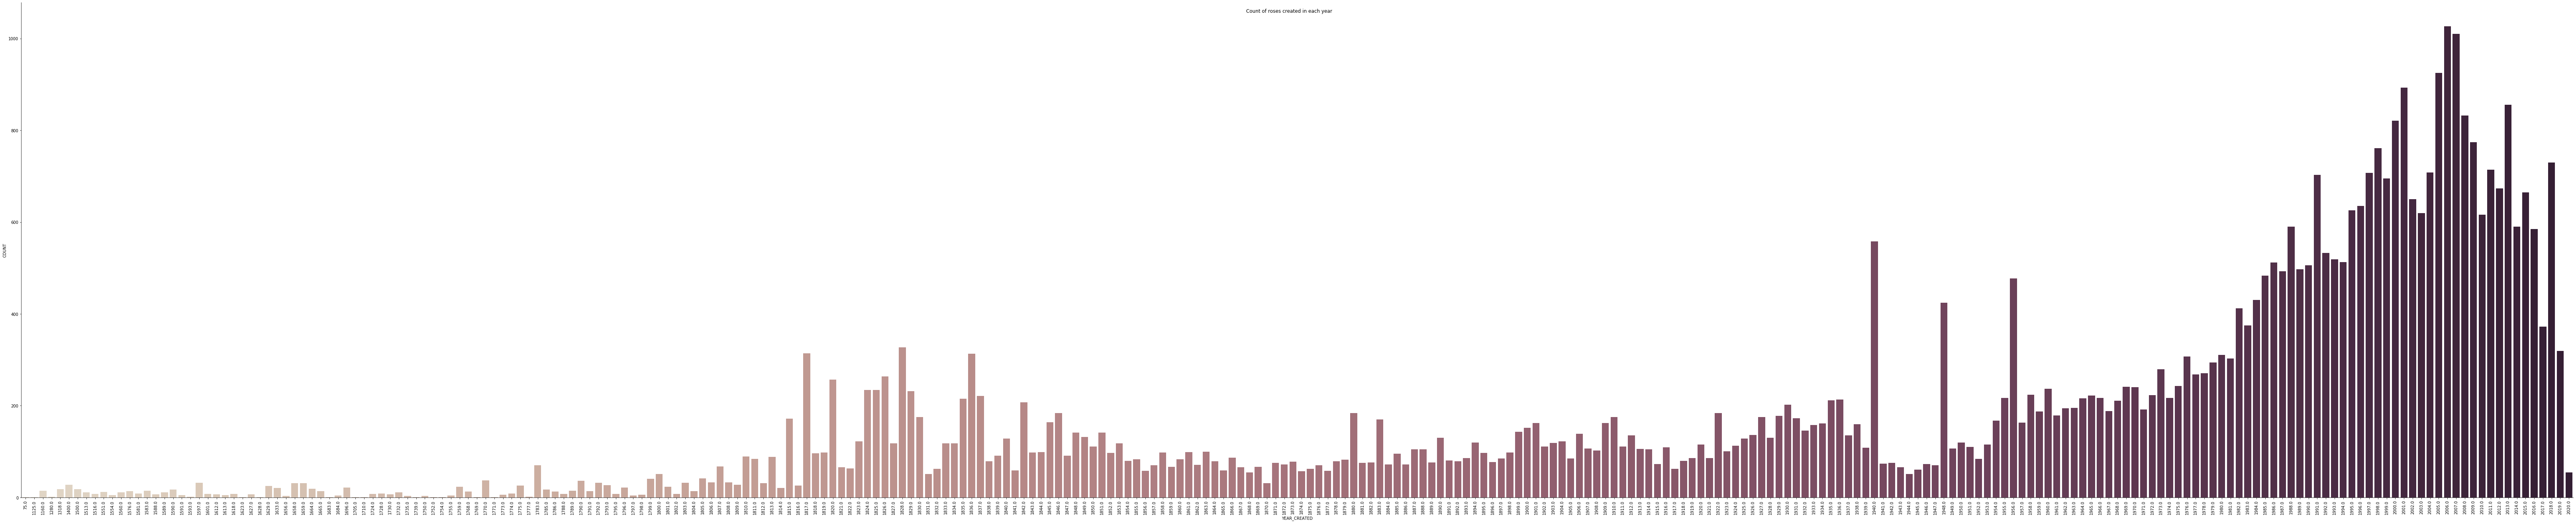

In [78]:
# show barchart with all years
g = sns.catplot(y="COUNT", x="YEAR_CREATED", kind="bar", palette="ch:.25",  data=ctn_year, height=18, aspect=5);
g.set_xticklabels(rotation=90)
g.fig.suptitle("Count of roses created in each year")

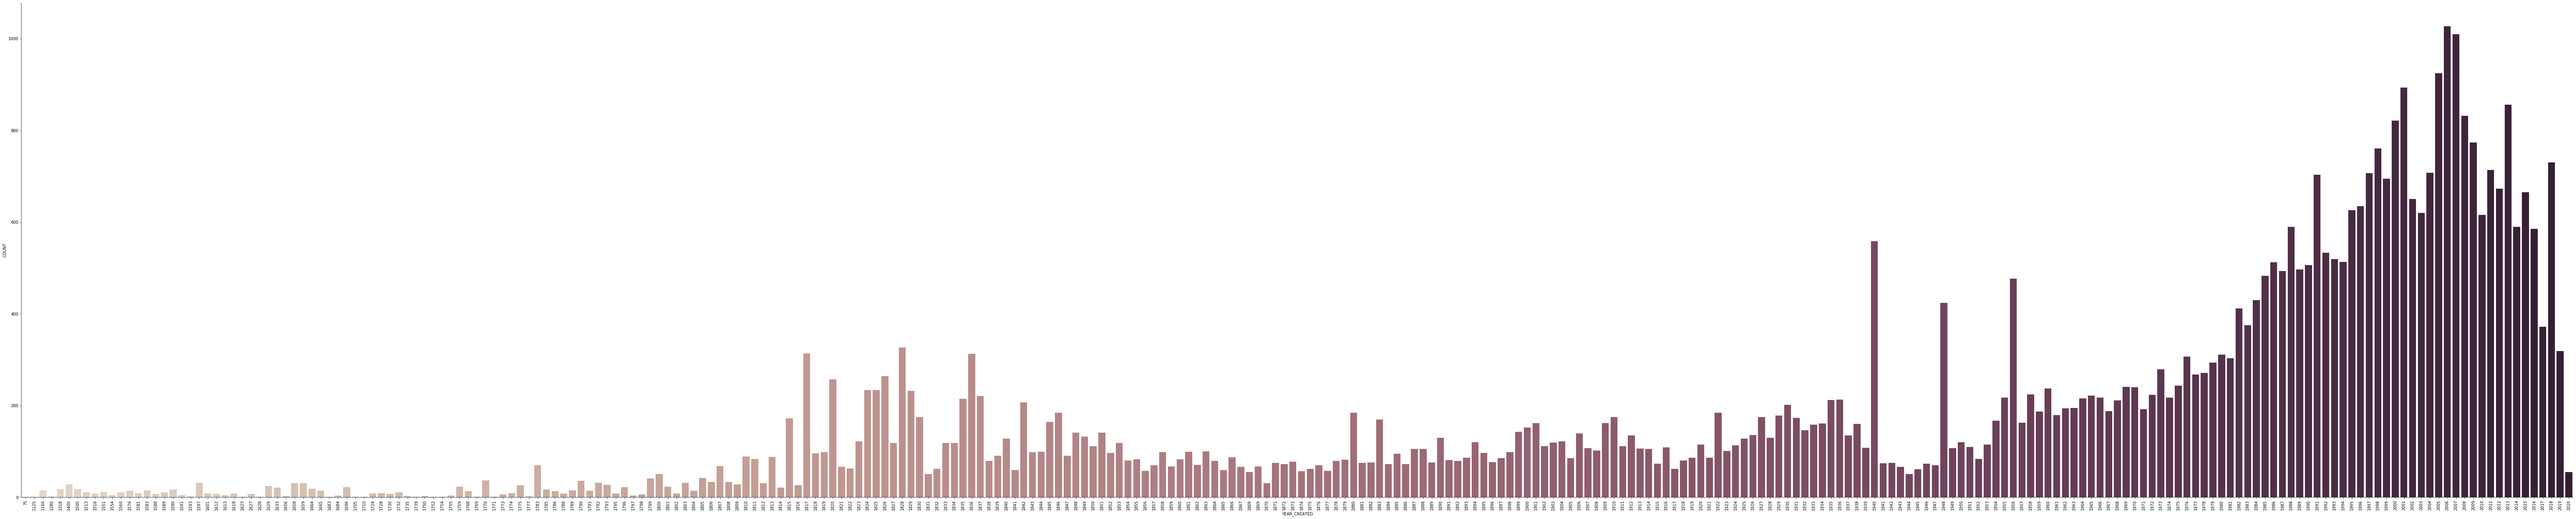